# **SME5924 - Processos Dinâmicos em Redes Complexas**


---


## **Questionário 3**

### Gabriela dos Santos Amaral - 13749681

# **Introdução**

Notebook contendo os códigos desenvolvidos na linguagem *Python* para responder o questionário 3 da disciplina de Processos Dinâmicos em Redes Complexas (SME5924).

In [102]:
# Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import requests
from scipy.stats import pearsonr, spearmanr

import random
import math

# **Questão 1:** A média medida eigenvector centrality da rede USairport500 é igual a quanto? Considere apenas o maior componente. Use:
```
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
```







Primeiro, vamos ler os dados USairport500 e visualizar o grafo:

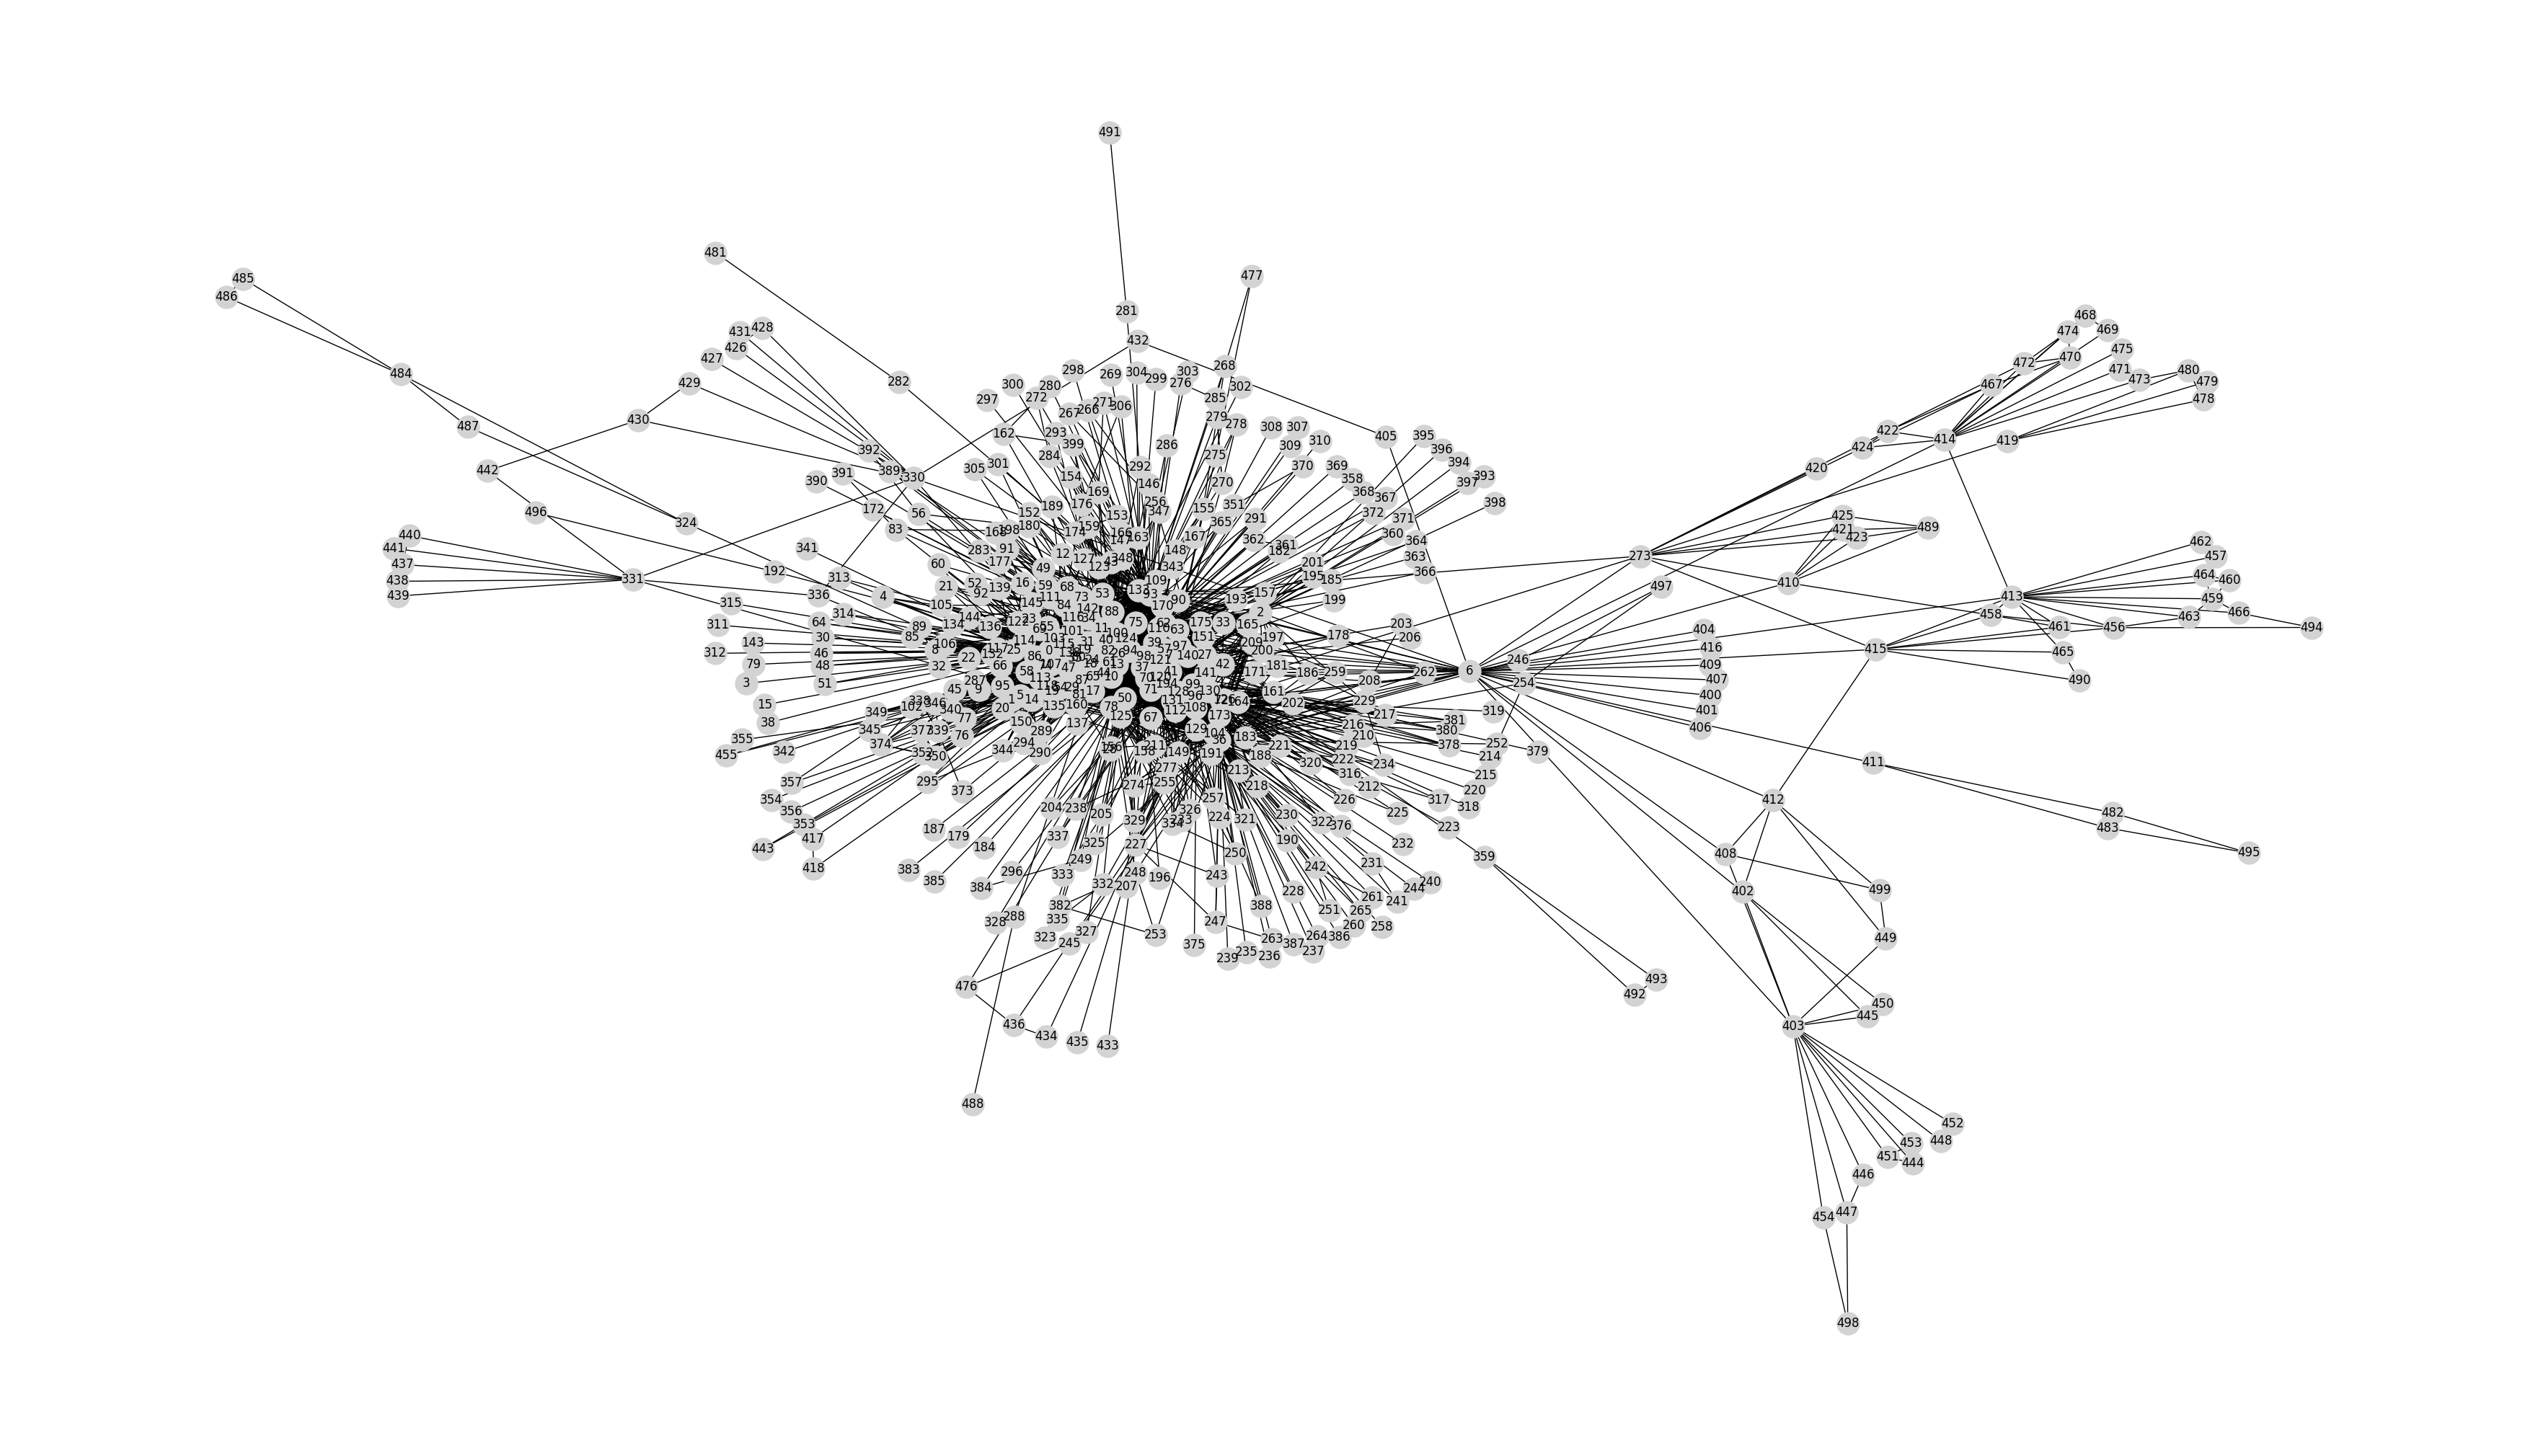

In [2]:
# Leitura da rede
network = 'USairport500'
url = f'https://raw.githubusercontent.com/GabrielaSAmaral/ComplexNetworks/main/Dados/{network}.txt'

response = requests.get(url)
with open(f'{network}.txt', 'w') as file:
    file.write(response.text)

G = nx.read_edgelist(f'{network}.txt', nodetype=int)

# Transformando os labels para números inteiros, começando com 0
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Para visualizar a rede
plt.figure(figsize=(35,20))
pos = nx.spring_layout(G, seed = 11) # Definindo uma seed para sempre obter o mesmo gráfico (mesmas posições)
nx.draw(G, pos, node_color='lightgray', node_size=500, with_labels=True)

In [3]:
# Para tranformar a rede em sem direção. Porém, como a rede já é não direcionada, o código não é necessário.
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

Vamos selecionar apenas o maior componente conectado:

In [4]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Outra forma
# Gcc = max(nx.connected_components(G), key=len)
# G = G.subgraph(Gcc).copy()

Podemos verificar o número de vértices (nodes) e arestas (edges):

In [5]:
N = len(G)
M = G.number_of_edges()
print('Número de nós (vértices):', N)
print('Número de arestas:', M)

Número de nós (vértices): 500
Número de arestas: 2980


Agora, iremos calcular a medida Eigenvetor Centrality, que determina a centralidade de um vértice de acordo com o quão visitado ele é se seguimos uma caminhada aleatória:

In [54]:
EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))
print('Eigenvetor centrality:', EC)

Eigenvetor centrality: {0: 0.19076801166001284, 1: 0.03636566857696688, 2: 0.0691626602921969, 3: 0.003968107284167804, 4: 0.008793199264018935, 5: 0.07118060019092086, 6: 0.04546430744771243, 7: 0.07323642015910903, 8: 0.01730443424706561, 9: 0.017922732745642947, 10: 0.0897698767865774, 11: 0.07380066147981246, 12: 0.02184958926877229, 13: 0.12467071731482425, 14: 0.131436508778258, 15: 0.003968107284167804, 16: 0.023602572915143526, 17: 0.07362620372650132, 18: 0.13953024621380883, 19: 0.04641141422804443, 20: 0.02448577438054315, 21: 0.01743753895063849, 22: 0.02329810285937023, 23: 0.04561503424842579, 24: 0.13802628925967486, 25: 0.14913393470874747, 26: 0.09676493405122416, 27: 0.046025725596912495, 28: 0.012354640796703582, 29: 0.03949654624376495, 30: 0.007070203451269203, 31: 0.17727093382439202, 32: 0.016769651517526653, 33: 0.020450615709312264, 34: 0.06667976179297104, 35: 0.1307198987514137, 36: 0.15277202028115405, 37: 0.178220963174855, 38: 0.003968107284167804, 39: 0.0

Adicionalmente, podemos fazer um gráfico da distribuição do Eigenvetor Centrality:

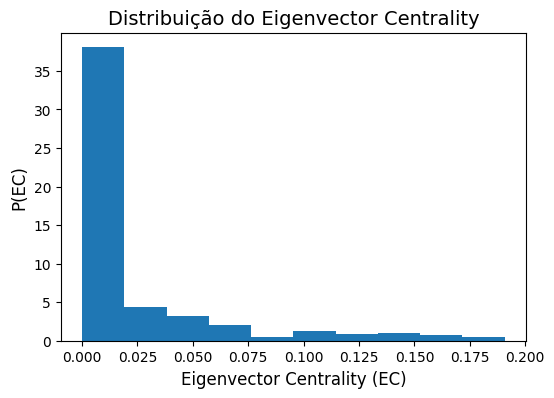

In [55]:
plt.figure(figsize=(6,4)) # tamanho da imagem
plt.hist(EC.values(), density=True)
plt.title("Distribuição do Eigenvector Centrality",fontsize=14)
plt.ylabel("P(EC)", fontsize=12)
plt.xlabel("Eigenvector Centrality (EC)", fontsize=12)
# plt.savefig('eigenvector.eps')
plt.show(True)

Por fim, iremos calcular a média do Eigenvetor Centrality:

In [57]:
EC_values = list(EC.values())
av_EC = np.mean(EC_values)
print('Average eigenvector centrality:', round(av_EC, 2))

Average eigenvector centrality: 0.02


# **Questão 2:** Calcule a correlação de Pearson entre a medida betweeness centrality e grau para a rede hamsterster. Use:

```
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
```







Primeiro, vamos ler os dados Hamsterster e visualizar o grafo:

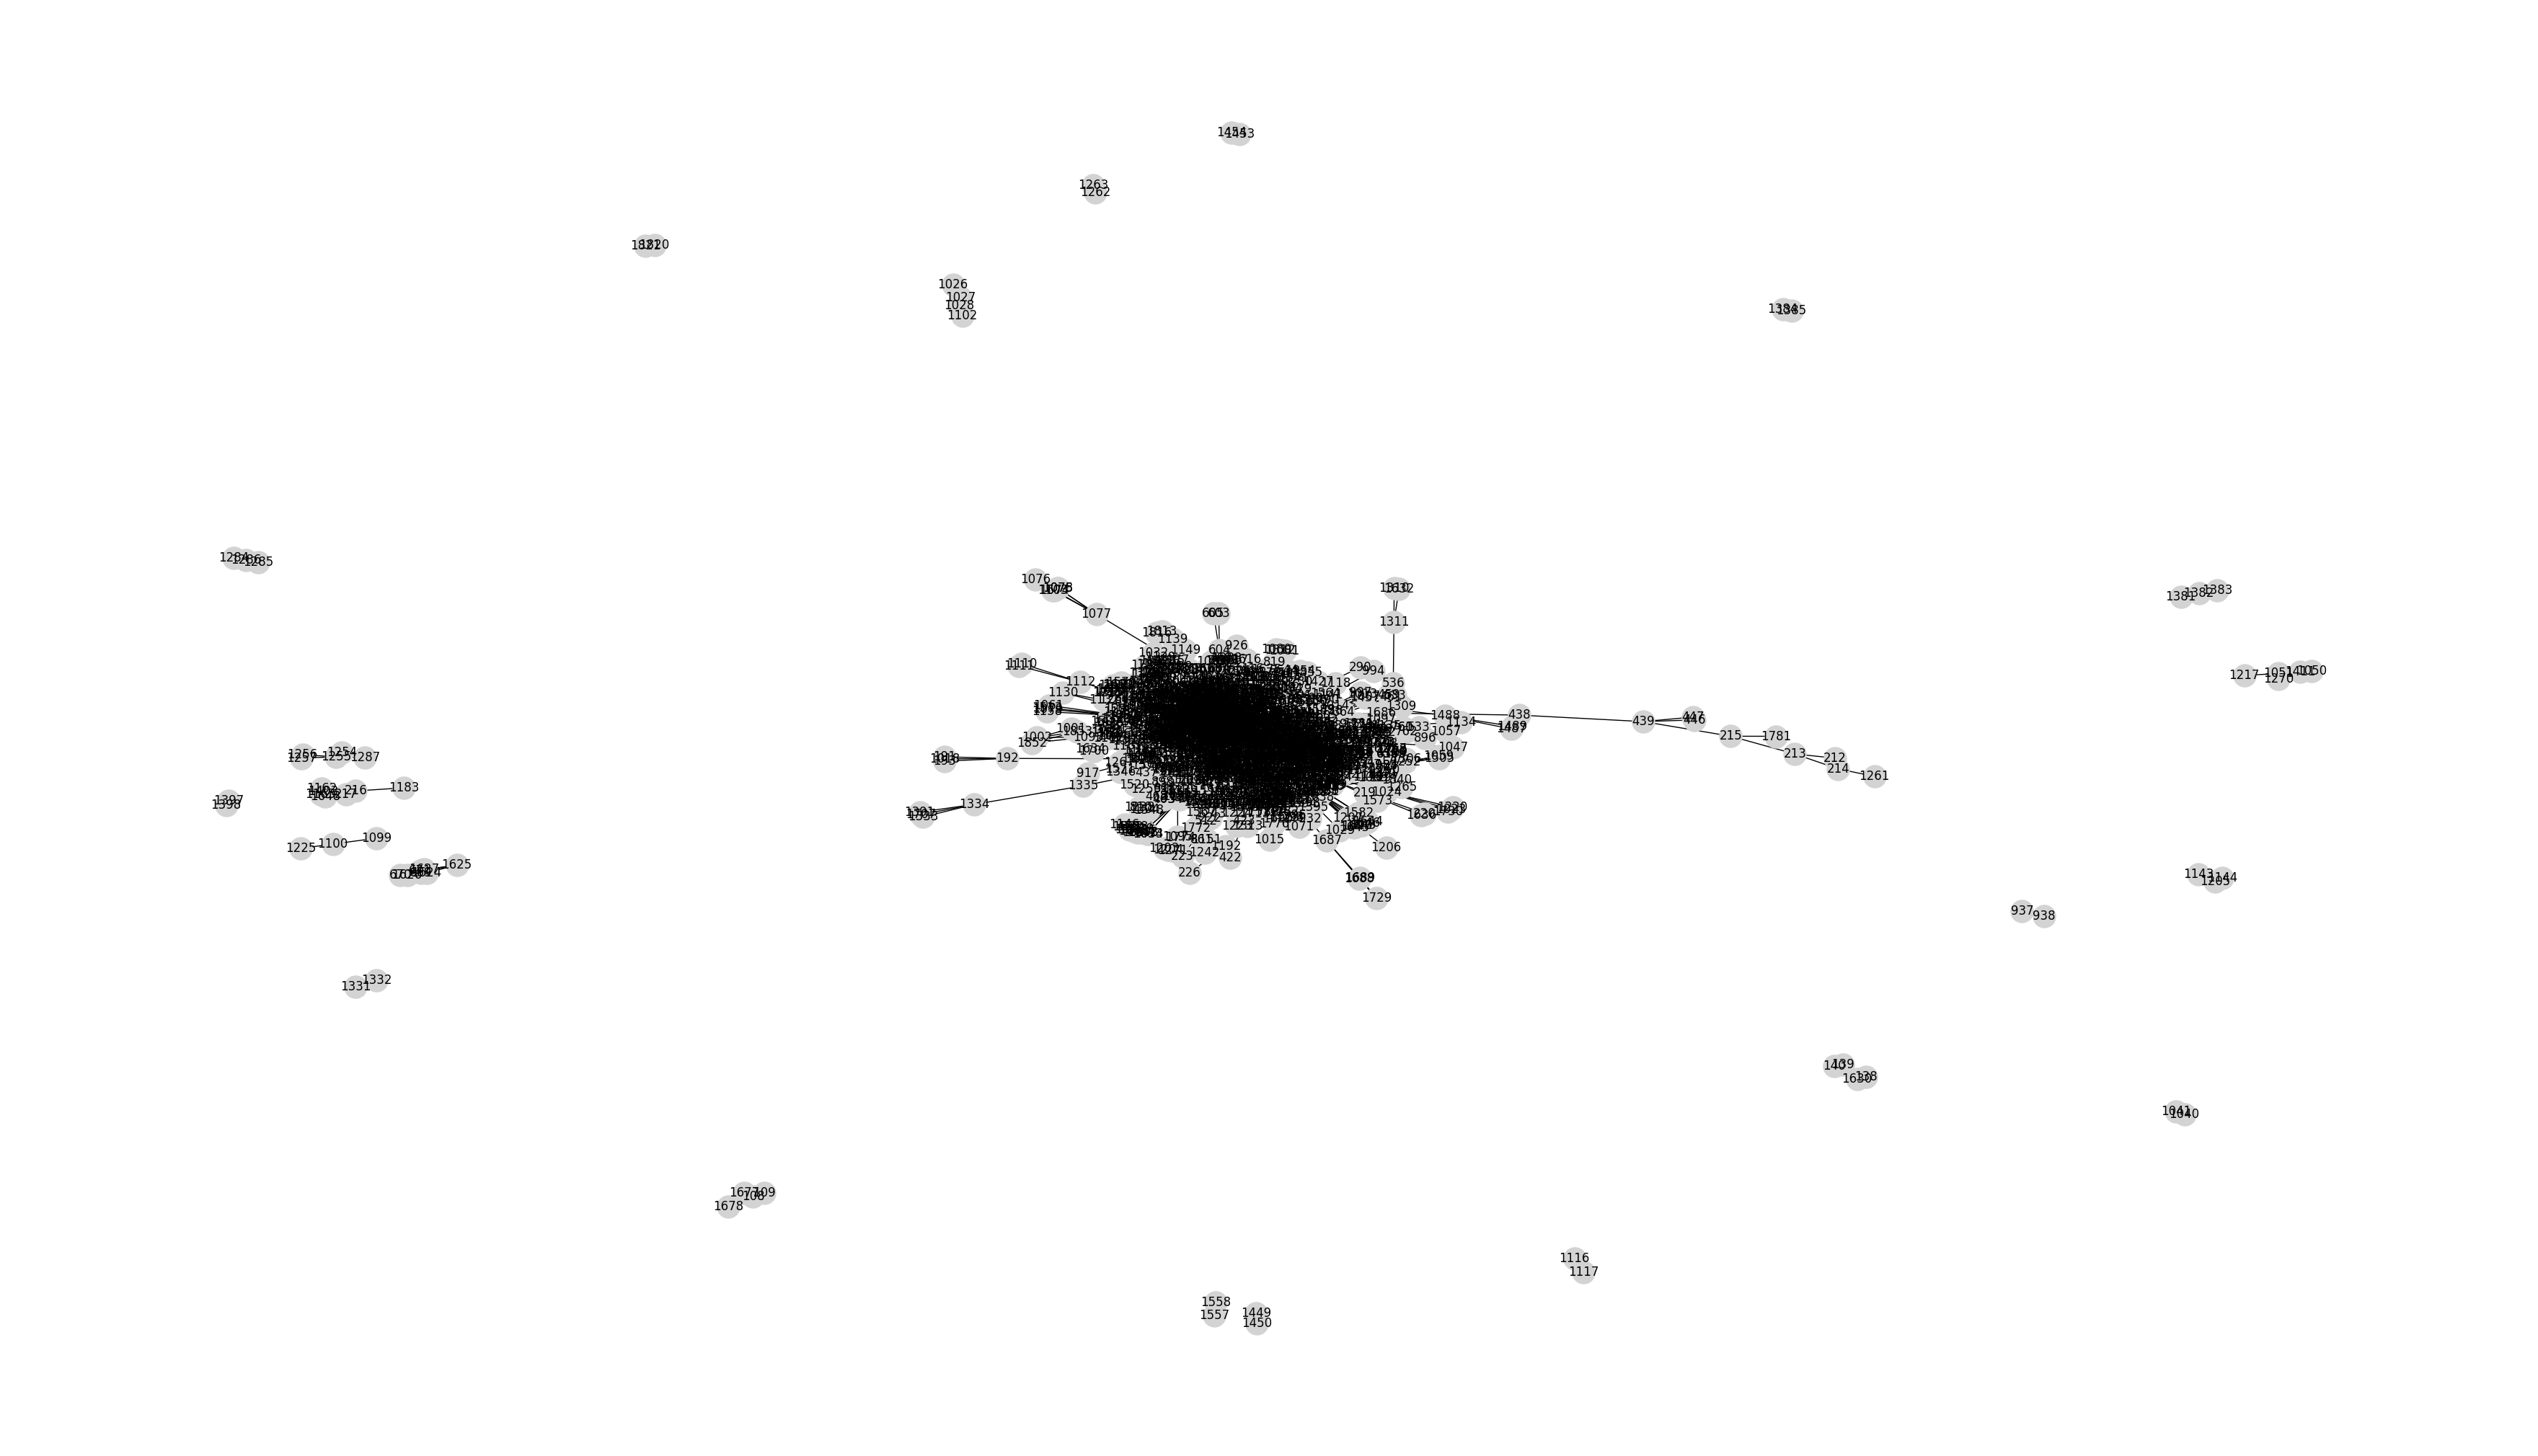

In [58]:
# Leitura da rede
network = 'hamsterster'
url = f'https://raw.githubusercontent.com/GabrielaSAmaral/ComplexNetworks/main/Dados/{network}.txt'

response = requests.get(url)
with open(f'{network}.txt', 'w') as file:
    file.write(response.text)

G2 = nx.read_edgelist(f'{network}.txt', nodetype=int)

# Transformando os labels para números inteiros, começando com 0
G2 = nx.convert_node_labels_to_integers(G2, first_label=0)

# Para visualizar a rede
plt.figure(figsize=(35,20))
pos = nx.spring_layout(G2, seed = 11) # Definindo uma seed para sempre obter o mesmo gráfico (mesmas posições)
nx.draw(G2, pos, node_color='lightgray', node_size=500, with_labels=True)

In [59]:
# Para tranformar a rede em sem direção. Porém, como a rede já é não direcionada, o código não é necessário.
G2 = G2.to_undirected()
G2.remove_edges_from(nx.selfloop_edges(G2))

Vamos selecionar apenas o maior componente conectado:

In [60]:
Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
G2 = G2.subgraph(Gcc[0])

# Outra forma
# Gcc = max(nx.connected_components(G), key=len)
# G = G.subgraph(Gcc).copy()

Podemos verificar o número de vértices (nodes) e arestas (edges):

In [61]:
N = len(G2)
M = G2.number_of_edges()
print('Número de nós (vértices):', N)
print('Número de arestas:', M)

Número de nós (vértices): 1788
Número de arestas: 12476


Agora, vamos calcular a medida Betweeness Centrality, que mede o quanto de carga um vértice recebe. Essa medida seria a proporção de visitas que o vértice recebe considerando os menores caminhos. A seguir, o cálculo:

In [71]:
BC = dict(nx.betweenness_centrality(G2))
print('Betweeness centrality:', BC)

Betweeness centrality: {0: 0.0032301395159124173, 1: 0.004359163634432046, 2: 4.69760984669588e-06, 3: 0.0019246756055983022, 4: 0.0015897108730727908, 5: 0.008317832920302798, 6: 0.00042458389219936216, 7: 1.9738944899129653e-05, 8: 0.023830285305123603, 9: 0.011152942491924013, 10: 0.004368348881463037, 11: 0.0034727280151145012, 12: 0.005163274835100675, 13: 0.00411887790194941, 14: 0.02975972399325523, 15: 0.05758339013331758, 16: 0.0002996185250389925, 17: 0.0009208796235972814, 18: 0.01340604707192026, 19: 0.0, 20: 0.004584667123603669, 21: 0.005518916467675661, 22: 0.00024335317825260338, 23: 7.846059838832014e-06, 24: 0.009177311193294593, 25: 0.0015066002983463687, 26: 0.0015066002983463687, 27: 0.0035460458888329164, 28: 0.008128163481218163, 29: 0.01456782086301145, 30: 0.01794811494908073, 31: 0.03539561691905463, 32: 0.0018450219333241019, 33: 0.006158468825870166, 34: 0.0010998920747460827, 35: 0.01315125260071138, 36: 0.010443397043085126, 37: 0.0061497432766047895, 38: 

Adicionalmente, podemos fazer um gráfico da distribuição do Betweenness Centrality:

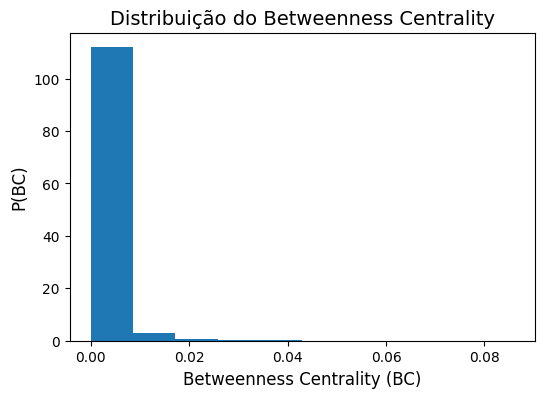

In [72]:
plt.figure(figsize=(6,4)) # tamanho da imagem
plt.hist(BC.values(), density=True)
plt.title("Distribuição do Betweenness Centrality",fontsize=14)
plt.ylabel("P(BC)", fontsize=12)
plt.xlabel("Betweenness Centrality (BC)", fontsize=12)
# plt.savefig('eigenvector.eps')
plt.show(True)

Por fim, vamos calcular a correlação de Pearson entre a medida Betweenness Centrality e grau:

In [93]:
# Valores da medida Betweenness Centrality para cada vértice
BC_values = list(BC.values())

# Valores do grau k de cada vértice
k_values = dict(G2.degree())
k_values = np.array(list(k_values.values()))

# Caculando o coeficiente de correlação de Pearson
rho, _ = pearsonr(BC_values, k_values)
print('Coeficiente de Correlação de Pearson entre a medida Betweenness Centrality e o grau k: %.1f' % rho)

# # Outra forma de calcular o coefiente de Pearson
# rho = np.corrcoef(BC_values, k_values)[0,1]

Coeficiente de Correlação de Pearson entre a medida Betweenness Centrality e o grau k: 0.8


Temos uma correlação (0.8) linear positiva e forte entre a medida Betweenness Centrality (BC) e o grau k. Dessa forma, quanto maior é grau k de um vértice, maior é sua medida BC.

# **Questão 3:** Calcule o coeficiente de correlação de Spearman entre as medidas closeness centrality e k-core para a rede "Jazz". Use:

```
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
```







Primeiro, vamos ler os dados Jazz e visualizar o grafo:

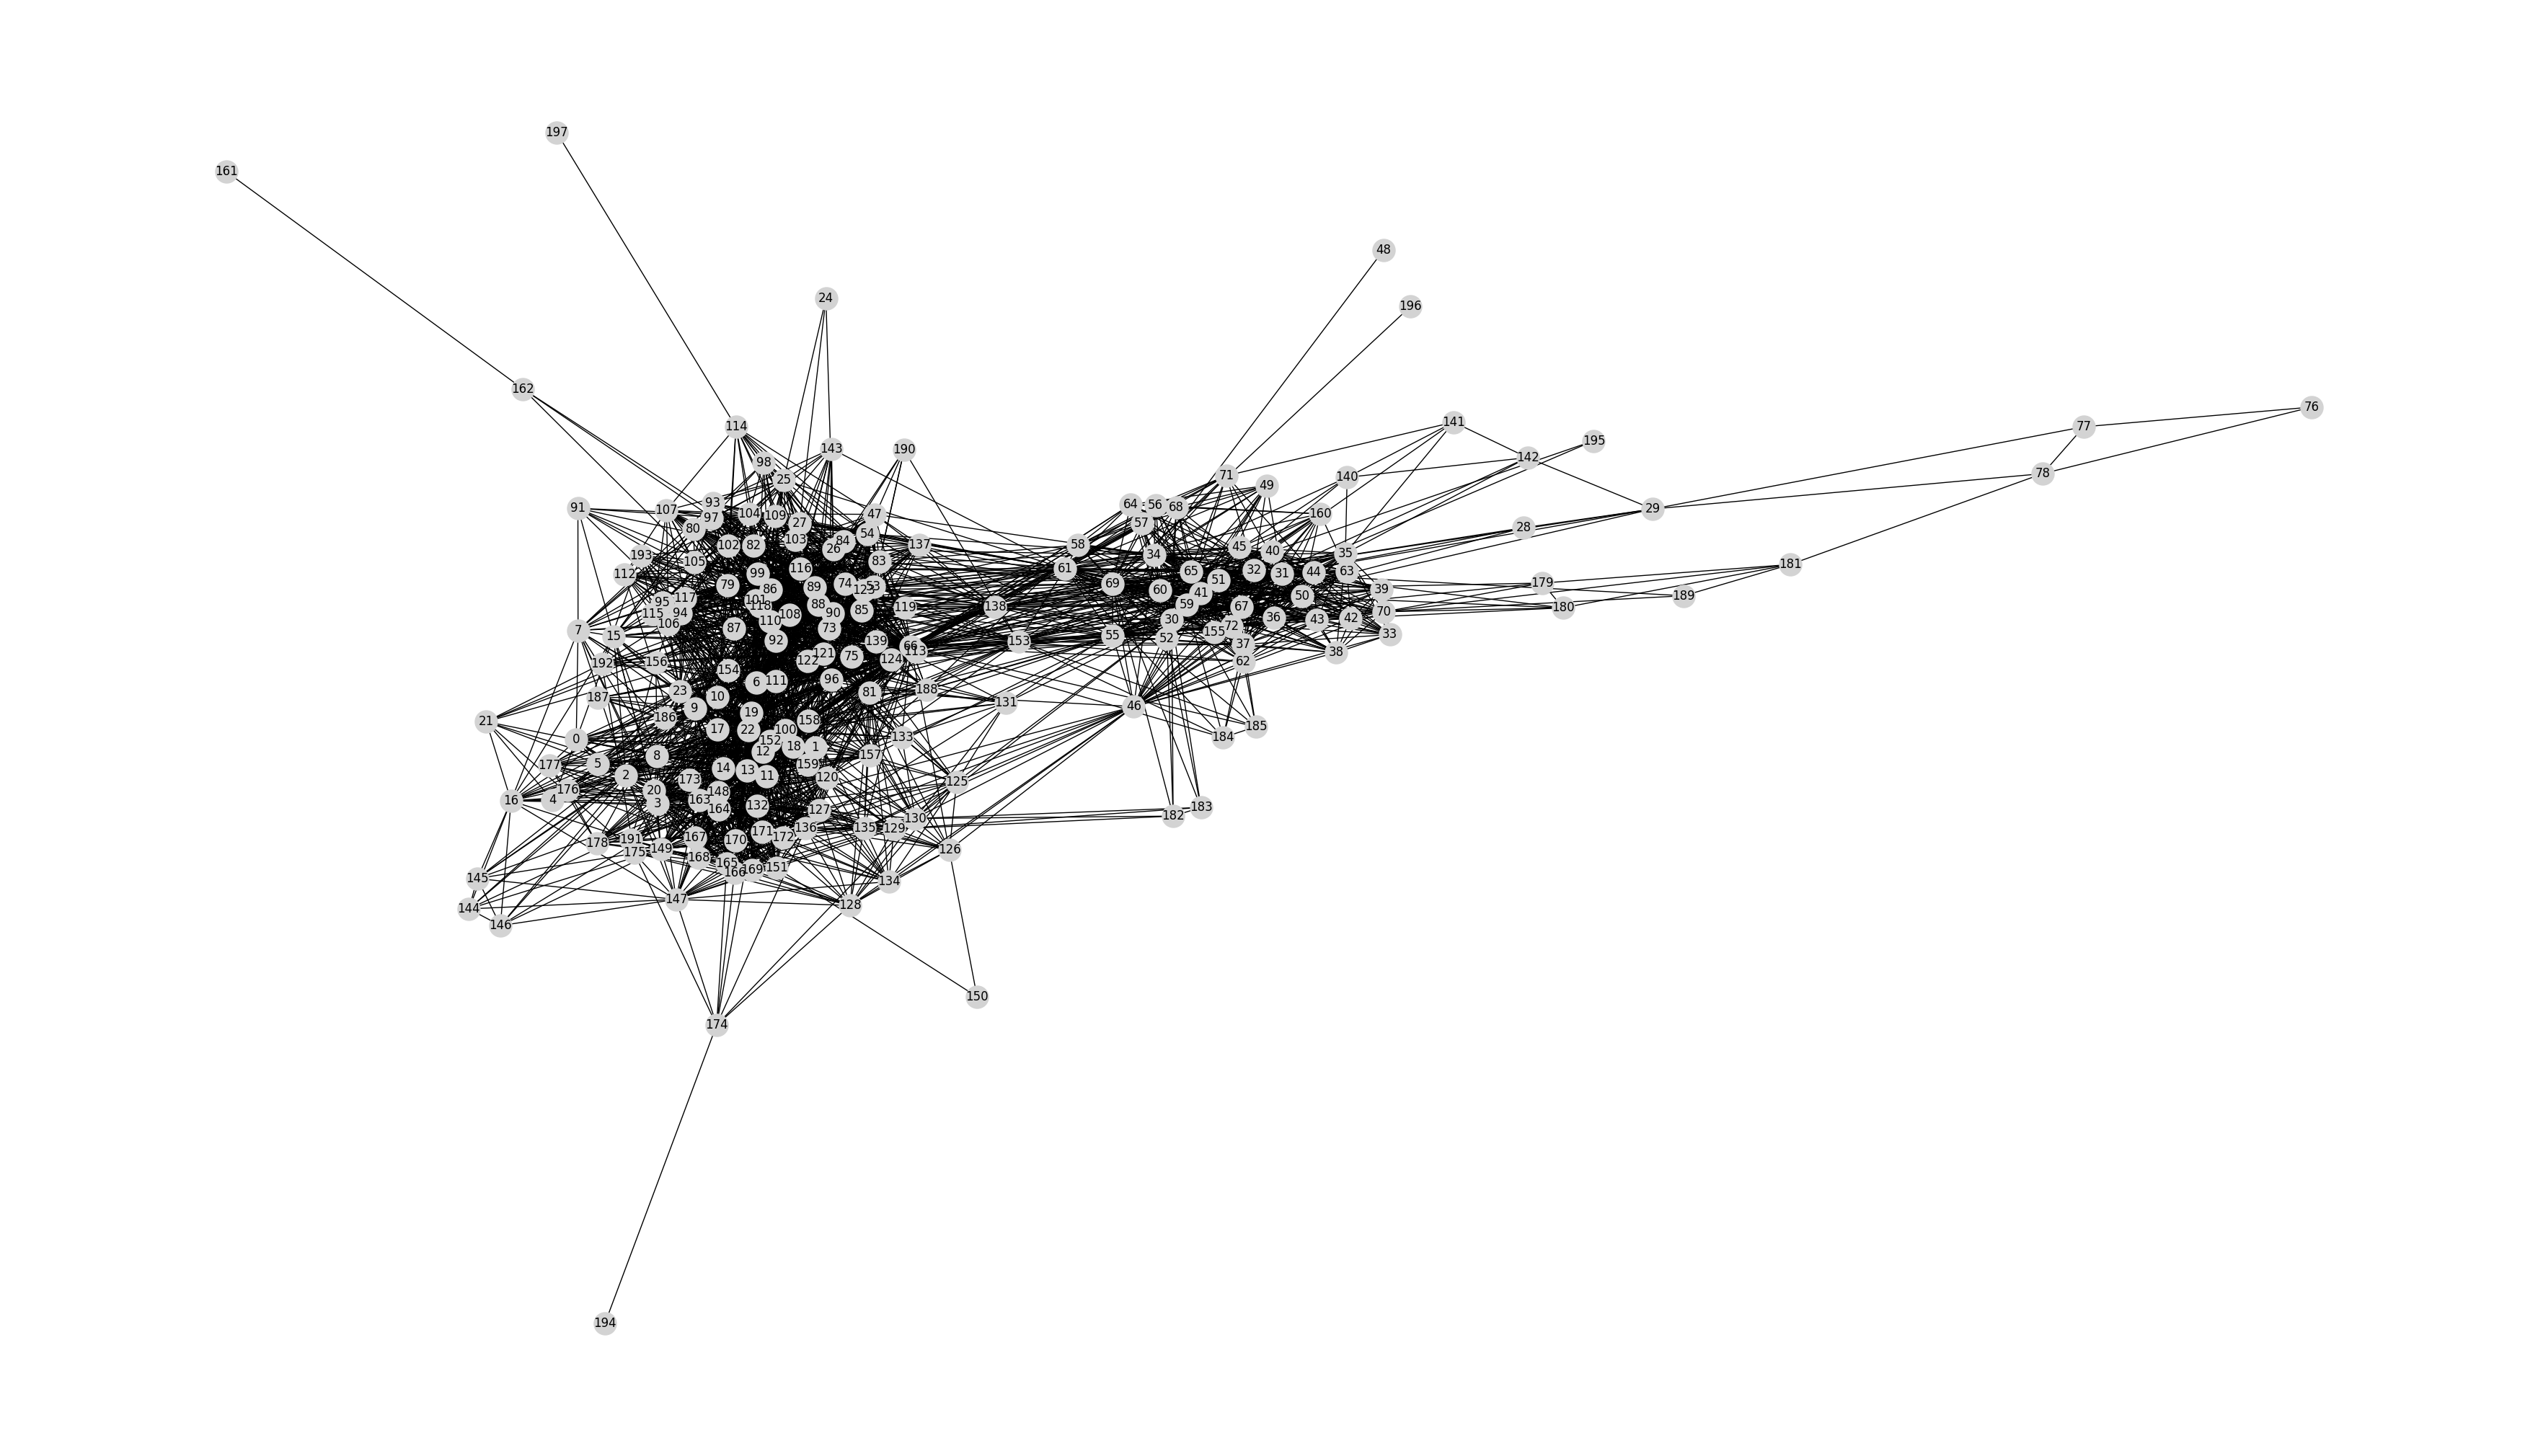

In [95]:
# Leitura da rede
network = 'jazz'
url = f'https://raw.githubusercontent.com/GabrielaSAmaral/ComplexNetworks/main/Dados/{network}.txt'

response = requests.get(url)
with open(f'{network}.txt', 'w') as file:
    file.write(response.text)

G3 = nx.read_edgelist(f'{network}.txt', nodetype=int)

# Transformando os labels para números inteiros, começando com 0
G3 = nx.convert_node_labels_to_integers(G3, first_label=0)

# Para visualizar a rede
plt.figure(figsize=(35,20))
pos = nx.spring_layout(G3, seed = 11) # Definindo uma seed para sempre obter o mesmo gráfico (mesmas posições)
nx.draw(G3, pos, node_color='lightgray', node_size=500, with_labels=True)

In [96]:
# Para tranformar a rede em sem direção. Porém, como a rede já é não direcionada, o código não é necessário.
G3 = G3.to_undirected()
G3.remove_edges_from(nx.selfloop_edges(G3))

Vamos selecionar apenas o maior componente conectado:

In [97]:
Gcc = sorted(nx.connected_components(G3), key=len, reverse=True)
G3 = G3.subgraph(Gcc[0])

# Outra forma
# Gcc = max(nx.connected_components(G), key=len)
# G = G.subgraph(Gcc).copy()

Podemos verificar o número de vértices (nodes) e arestas (edges):

In [98]:
N = len(G3)
M = G3.number_of_edges()
print('Número de nós (vértices):', N)
print('Número de arestas:', M)

Número de nós (vértices): 198
Número de arestas: 2742


Agora, vamos calcular a medida Closeness Centrality, que considera a distância média entre um vértice e os demais, e a medida k-core, que decompõe a rede em subgrafos para determinar o subgrafo mais conectado em que todos os vértices é de grau k:

In [100]:
CLC = dict(nx.closeness_centrality(G3))
print('Closeness Centrality', CLC)

Closeness Centrality {0: 0.42919389978213507, 1: 0.4613583138173302, 2: 0.48402948402948404, 3: 0.4613583138173302, 4: 0.44269662921348313, 5: 0.4310722100656455, 6: 0.5898203592814372, 7: 0.42919389978213507, 8: 0.48284313725490197, 9: 0.49873417721518987, 10: 0.5038363171355499, 11: 0.5116883116883116, 12: 0.5367847411444142, 13: 0.5157068062827225, 14: 0.5157068062827225, 15: 0.4457013574660634, 16: 0.4129979035639413, 17: 0.5324324324324324, 18: 0.5253333333333333, 19: 0.5549295774647888, 20: 0.4613583138173302, 21: 0.4121338912133891, 22: 0.5811209439528023, 23: 0.5077319587628866, 24: 0.3588342440801457, 25: 0.4746987951807229, 26: 0.5225464190981433, 27: 0.5184210526315789, 28: 0.3724007561436673, 29: 0.37595419847328243, 30: 0.5225464190981433, 31: 0.5116883116883116, 32: 0.49747474747474746, 33: 0.3971774193548387, 34: 0.5090439276485789, 35: 0.4164904862579281, 36: 0.4497716894977169, 37: 0.4613583138173302, 38: 0.40286298568507156, 39: 0.38703339882121807, 40: 0.452873563218

In [104]:
KC= dict(nx.core_number(G3))
print('k-core:', KC)

k-core: {0: 18, 1: 18, 2: 18, 3: 29, 4: 11, 5: 18, 6: 29, 7: 18, 8: 18, 9: 21, 10: 21, 11: 29, 12: 29, 13: 29, 14: 29, 15: 18, 16: 15, 17: 29, 18: 29, 19: 29, 20: 29, 21: 10, 22: 29, 23: 21, 24: 3, 25: 20, 26: 21, 27: 21, 28: 4, 29: 4, 30: 17, 31: 17, 32: 17, 33: 16, 34: 17, 35: 17, 36: 17, 37: 17, 38: 17, 39: 17, 40: 17, 41: 17, 42: 17, 43: 17, 44: 17, 45: 17, 46: 17, 47: 20, 48: 1, 49: 13, 50: 17, 51: 17, 52: 15, 53: 21, 54: 21, 55: 17, 56: 15, 57: 15, 58: 15, 59: 17, 60: 17, 61: 17, 62: 15, 63: 15, 64: 15, 65: 17, 66: 21, 67: 17, 68: 15, 69: 17, 70: 16, 71: 11, 72: 17, 73: 21, 74: 21, 75: 21, 76: 2, 77: 2, 78: 2, 79: 21, 80: 20, 81: 16, 82: 21, 83: 21, 84: 20, 85: 21, 86: 21, 87: 21, 88: 21, 89: 21, 90: 20, 91: 9, 92: 21, 93: 19, 94: 21, 95: 21, 96: 21, 97: 20, 98: 13, 99: 21, 100: 29, 101: 21, 102: 21, 103: 20, 104: 21, 105: 20, 106: 21, 107: 20, 108: 21, 109: 20, 110: 21, 111: 21, 112: 19, 113: 21, 114: 14, 115: 21, 116: 21, 117: 21, 118: 21, 119: 17, 120: 29, 121: 21, 122: 21, 12

Por fim, iremos calcular o coeficiente de correlação de Spearman entre as medidas Closeness Centrality e k-core:

In [114]:
# Valores da medida Closeness Centrality para cada vértice
CLC_values = list(CLC.values())

# Valores da medida k-core para cada vértice
KC_values = list(KC.values())

# Caculando o coeficiente de correlação de Spearman
s = spearmanr(CLC_values, KC_values)
print('Coeficiente de Correlação de Spearman : %.1f' % s[0])
print('p-value:', s[1])

Coeficiente de Correlação de Spearman : 0.7
p-value: 5.889403279320568e-35


Obtemos um coeficiente de Spearman igual a 0.7, indicando que a correlação não linear entre as medidas Closeness Centrality e k-core é positiva e moderada. Além disso, obtemos um p-value bem próximo de zero, logo, podemos rejeitar a hipótese de que essas duas medidas não estão correlacionadas e, portanto, a relação entre elas é significativa.

# **Questão 4:** Escolha as medidas de centralidade.

| Descrição | Medida de Centralidade Escolhida |
|----------------------|------------------|
|Um vértice é considerado central se estiver conectado a outros centrais. É usada em redes dirigidas.| PageRank |
|É calculada a partir do espectro da matriz de adjacência.| Eigenvetor Centrality |
|Usa os menores caminhos de modo a determinar a carga (em termos da quantidade de tráfego) em cada vértice.| Betweenness Centrality |
|É calculada a partir da exponencial da matriz de probabilidade de transição.| Random Walk Accessibility |
|É uma medida de centralidade local, pois alguns vértices com valores altos dessa medida podem estar na borda da rede.| Degree Centrality |
|Considera o menores caminhos entre os pares de vértices.| Closeness Centrality |





